In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
# ignore warnings in the output
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [3]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist

# Split the dataset into training and testing sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# plot the first 9 images in the training set
import matplotlib.pyplot as plt
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((1, 1)),  # modify the pool size to match the output shape
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),  # add dropout layer with a dropout rate of 0.2
    tf.keras.layers.Dense(64, activation='relu'),  # New Dense layer
    tf.keras.layers.Dropout(0.3),  # New Dropout layer
    tf.keras.layers.Dense(32, activation='relu'),  # New Dense layer
    tf.keras.layers.Dense(10, activation='softmax')
])

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2349 - accuracy: 0.9311 - val_loss: 0.0995 - val_accuracy: 0.9719
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2230 - accuracy: 0.9343 - val_loss: 0.0886 - val_accuracy: 0.9756
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2063 - accuracy: 0.9398 - val_loss: 0.0869 - val_accuracy: 0.9761
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1978 - accuracy: 0.9414 - val_loss: 0.0923 - val_accuracy: 0.9726
Epoch 5/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1906 - accuracy: 0.9438 - val_loss: 0.0786 - val_accuracy: 0.9783
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1874 - accuracy: 0.9451 - val_loss: 0.0855 - val_accuracy: 0.9759
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1804 - accuracy: 0.9479 - val_loss: 0.0814 -

In [12]:
# evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0773 - accuracy: 0.9791
Test accuracy: 0.9790999889373779


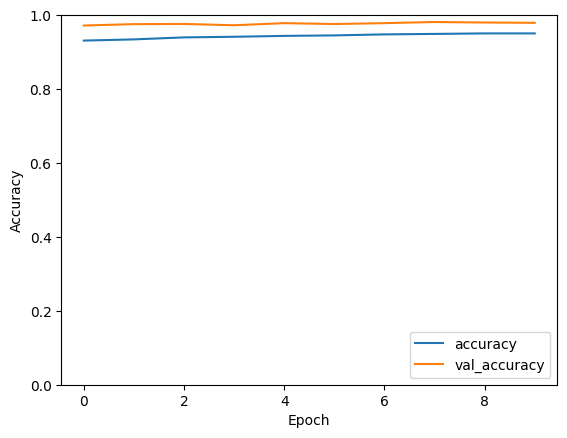

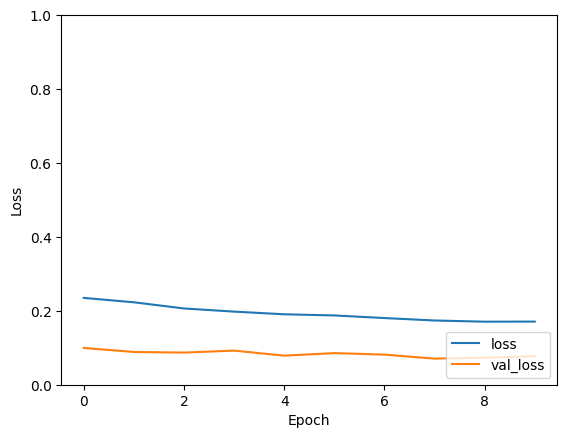

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Tensorboard

In [14]:
tensorboard_callback = TensorBoard(log_dir='./logs/adam', histogram_freq=1)


In [15]:
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test,y_test), callbacks=[tensorboard_callback])


Epoch 1/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1612 - accuracy: 0.9537 - val_loss: 0.0700 - val_accuracy: 0.9804
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1546 - accuracy: 0.9551 - val_loss: 0.0698 - val_accuracy: 0.9816
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1545 - accuracy: 0.9562 - val_loss: 0.0733 - val_accuracy: 0.9811
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1477 - accuracy: 0.9578 - val_loss: 0.0740 - val_accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1487 - accuracy: 0.9587 - val_loss: 0.0729 - val_accuracy: 0.9795


In [17]:
%load_ext tensorboard
%tensorboard --logdir=./logs


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 27836), started 0:00:29 ago. (Use '!kill 27836' to kill it.)

# Hyperparameter Tuning and Visualization using TensorBoard

In [20]:
optimizers=["Adam","SGD"]

for optimizer in optimizers:
    model = Sequential([
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((1,1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])


    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    
    batch_sizes = [16, 32, 64, 128]
    for batch_size in batch_sizes: 
        log_dir = f'./logs/{optimizer}_batch_size_{batch_size}'
        tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
        model.fit(X_train, y_train, epochs=5, batch_size=batch_size, validation_data=(X_test,y_test), callbacks=[tensorboard_callback])


Epoch 1/5
3750/3750 [==============================] - 52s 13ms/step - loss: 0.7348 - accuracy: 0.7431 - val_loss: 0.1698 - val_accuracy: 0.9553
Epoch 2/5
3750/3750 [==============================] - 54s 14ms/step - loss: 0.3210 - accuracy: 0.8938 - val_loss: 0.1013 - val_accuracy: 0.9701
Epoch 3/5
3750/3750 [==============================] - 30s 8ms/step - loss: 0.2610 - accuracy: 0.9156 - val_loss: 0.0852 - val_accuracy: 0.9760
Epoch 4/5
3750/3750 [==============================] - 31s 8ms/step - loss: 0.2280 - accuracy: 0.9275 - val_loss: 0.0677 - val_accuracy: 0.9799
Epoch 5/5
3750/3750 [==============================] - 31s 8ms/step - loss: 0.2072 - accuracy: 0.9337 - val_loss: 0.0745 - val_accuracy: 0.9781
Epoch 1/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1895 - accuracy: 0.9378 - val_loss: 0.0563 - val_accuracy: 0.9821
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1857 - accuracy: 0.9409 - val_loss: 0.0579 - val_accur

In [23]:
%load_ext tensorboard

# Run TensorBoard
%tensorboard --logdir=./logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 27836), started 0:51:24 ago. (Use '!kill 27836' to kill it.)

# Select the model with the highest accuracy

In [25]:
optimizers=["Adam","SGD"]

for optimizer in optimizers:
    model = Sequential([
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((1,1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])


    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    best_val_acc=0
    batch_sizes = [16,32]
    for batch_size in batch_sizes: 
        log_dir = f'./logs/{optimizer}_batch_size_{batch_size}'
        tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
        model.fit(X_train, y_train, epochs=2, batch_size=batch_size, validation_data=(X_test,y_test), callbacks=[tensorboard_callback])

        # Evaluate on validation data
        _, val_acc = model.evaluate(X_test, y_test)

        # Check if current model is the best
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model = model

tf.summary.scalar('Best Validation Accuracy', best_val_acc, step=0)

Epoch 1/2
3750/3750 [==============================] - 36s 9ms/step - loss: 0.5549 - accuracy: 0.8110 - val_loss: 0.1440 - val_accuracy: 0.9570
Epoch 2/2
313/313 [==============================] - 2s 6ms/step - loss: 0.0966 - accuracy: 0.9727
Epoch 1/2
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2544 - accuracy: 0.9115 - val_loss: 0.0818 - val_accuracy: 0.9757
Epoch 2/2
313/313 [==============================] - 2s 6ms/step - loss: 0.0761 - accuracy: 0.9768
Epoch 1/2
3750/3750 [==============================] - 55s 14ms/step - loss: 1.1485 - accuracy: 0.5926 - val_loss: 0.3755 - val_accuracy: 0.8992
Epoch 2/2
313/313 [==============================] - 2s 6ms/step - loss: 0.2303 - accuracy: 0.9371
Epoch 1/2
1875/1875 [==============================] - 33s 17ms/step - loss: 0.4835 - accuracy: 0.8315 - val_loss: 0.1840 - val_accuracy: 0.9501
Epoch 2/2
313/313 [==============================] - 2s 7ms/step - loss: 0.1601 - accuracy: 0.9571


<tf.Tensor: shape=(), dtype=bool, numpy=False>